# Machine Learning Engineer Nanodegree
## Capstone Project
Riccardo Rizzari  
May, 2017

## Project Domain: Investment and Trading

## Project Title: Market sentiment prediction for Commodity prices

### Data import and exploration

#### Importing libraries and defining the markets

In [36]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# dictionary with the commodity futures names and corresponding Bloomberg Ticker
commos_dict = {'WTI':'CL', 'Corn_US':'C ', 'Gold':'GC', 'Wheat_CH':'W ', 'Coffee_AR':'KC','Soybeans':'S '}
filename_start = 'data'
filename_format = '.csv'

#### Loading data for a specific market

In [37]:
# name of the CSV file for the Oil Market data
file_to_load = commos_dict['Soybeans']
# full name of the CSV file
filename = filename_start + file_to_load + filename_format

df = pd.read_csv(filename, parse_dates=['Dates'])
df.dropna(inplace=True)
df.sort_values('Dates', axis=0, ascending=True, inplace=True)
df.head()

,Dates,y,CHG_PCT_1D,CHG_PCT_5D,PX_OPEN,PX_HIGH,PX_LOW,PX_VOLUME,PX_LAST,MOV_AVG_5D,...,RSI_30D,VOLUME_TOTAL_CALL,VOLUME_TOTAL_PUT,VOLATILITY_10D,VOLATILITY_30D,30DAY_IMPVOL_105.0%MNY_DF,30DAY_IMPVOL_100.0%MNY_DF,30DAY_IMPVOL_95.0%MNY_DF,30DAY_IMPVOL_110.0%MNY_DF,30DAY_IMPVOL_90.0%MNY_DF
498,2015-04-10,0.0,-0.22,-3.51,954.00,958.50,944.50,125611.0,951.50,965.20,...,34.54,22984.0,49916.0,16.86,15.40,17.38,16.60,17.30,19.90,19.81
497,2015-04-13,0.0,-0.32,-3.08,948.00,957.50,945.75,103494.0,948.75,959.25,...,32.21,12104.0,10704.0,16.08,15.41,17.07,16.48,17.62,19.79,21.02
496,2015-04-14,1.0,1.19,-1.18,948.75,961.50,948.50,142042.0,960.25,957.10,...,38.54,12973.0,20816.0,13.97,14.95,17.40,16.69,17.87,20.42,21.02
495,2015-04-15,1.0,0.39,-0.84,959.25,976.75,958.75,155426.0,965.00,955.80,...,40.27,18958.0,37184.0,14.83,14.79,16.68,15.86,17.03,20.11,20.28
494,2015-04-16,1.0,0.13,1.16,964.00,970.25,955.50,90548.0,966.00,958.30,...,44.42,15464.0,20302.0,14.58,14.80,16.49,15.52,16.78,19.82,20.80


#### Extracting features and labels

In [38]:
# exporting labels, dates, and daily percentage change in separate datasets
labels = np.asarray(df['y'])
dates = df['Dates']
perc_chg = np.asarray(df['CHG_PCT_1D'])

data = df.drop(['y','Dates'], axis=1)

data.head()

,CHG_PCT_1D,CHG_PCT_5D,PX_OPEN,PX_HIGH,PX_LOW,PX_VOLUME,PX_LAST,MOV_AVG_5D,MOV_AVG_30D,RSI_9D,...,RSI_30D,VOLUME_TOTAL_CALL,VOLUME_TOTAL_PUT,VOLATILITY_10D,VOLATILITY_30D,30DAY_IMPVOL_105.0%MNY_DF,30DAY_IMPVOL_100.0%MNY_DF,30DAY_IMPVOL_95.0%MNY_DF,30DAY_IMPVOL_110.0%MNY_DF,30DAY_IMPVOL_90.0%MNY_DF
498,-0.22,-3.51,954.00,958.50,944.50,125611.0,951.50,965.20,978.77,37.25,...,34.54,22984.0,49916.0,16.86,15.40,17.38,16.60,17.30,19.90,19.81
497,-0.32,-3.08,948.00,957.50,945.75,103494.0,948.75,959.25,976.03,35.16,...,32.21,12104.0,10704.0,16.08,15.41,17.07,16.48,17.62,19.79,21.02
496,1.19,-1.18,948.75,961.50,948.50,142042.0,960.25,957.10,974.33,40.71,...,38.54,12973.0,20816.0,13.97,14.95,17.40,16.69,17.87,20.42,21.02
495,0.39,-0.84,959.25,976.75,958.75,155426.0,965.00,955.80,972.88,28.76,...,40.27,18958.0,37184.0,14.83,14.79,16.68,15.86,17.03,20.11,20.28
494,0.13,1.16,964.00,970.25,955.50,90548.0,966.00,958.30,972.11,31.98,...,44.42,15464.0,20302.0,14.58,14.80,16.49,15.52,16.78,19.82,20.80


#### Inspecting data elements and setting the size of the test set:

In [39]:
n_records = len(data)

n_market_up = labels[labels==1].sum()

n_market_up_percent = 1.0*n_market_up/n_records

# setting the size of the test set
test_size = n_records // 2

n_market_up_test = labels[-test_size:].sum()

# print results
print('Total number of data rows: {}'.format(n_records))
print('Test set number of data rows: {}'.format(test_size))
print('Number of times market trending higher: {}'.format(n_market_up))
print('Up trends in %: {:.2%}'.format(n_market_up_percent))
print('Up trends in % in the test set: {:.2%}'.format(1.0*n_market_up_test/test_size))

Total number of data rows: 493
Test set number of data rows: 246
Number of times market trending higher: 234.0
Up trends in %: 47.46%
Up trends in % in the test set: 45.93%


#### Checking the skew of the dataset:

In [40]:
data.skew(axis=0)

CHG_PCT_1D                   0.027202
CHG_PCT_5D                  -0.022216
PX_OPEN                      0.372162
PX_HIGH                      0.384451
PX_LOW                       0.356332
PX_VOLUME                    0.480073
PX_LAST                      0.365988
MOV_AVG_5D                   0.333517
MOV_AVG_30D                  0.207152
RSI_9D                       0.022322
RSI_14D                      0.201550
RSI_30D                      0.366937
VOLUME_TOTAL_CALL            1.691896
VOLUME_TOTAL_PUT             1.972279
VOLATILITY_10D               1.820392
VOLATILITY_30D               0.942089
30DAY_IMPVOL_105.0%MNY_DF    1.055938
30DAY_IMPVOL_100.0%MNY_DF    0.821875
30DAY_IMPVOL_95.0%MNY_DF     0.937251
30DAY_IMPVOL_110.0%MNY_DF    1.230874
30DAY_IMPVOL_90.0%MNY_DF     1.166052
dtype: float64

#### Applying a log transformation to features with skew greater than 0.9 or less than -0.9. 
#### *Printing the names of the skewed columns is very important because we have to make sure that the columns that we are flattening the skew for are columns that never contain negative values*

#### Function to flatten the skew

In [41]:
def flatten_skew(df, skew_threshold=0.9):
    '''  
    takes a pandas dataframe 'df' and applies a log transformation 
    to features with a skew greater than 'skew_threshold' in absolute value
    '''
    skewed = []
    for col in df.columns:
        if abs(df[col].skew(axis=0)) > 0.9: skewed.append(col)
    print(skewed)
    df[skewed] = df[skewed].apply(lambda x: np.log(x))
    return df

#### Applying the skew flatten function to the data

In [42]:
data = flatten_skew(data)
data.head()

['VOLUME_TOTAL_CALL', 'VOLUME_TOTAL_PUT', 'VOLATILITY_10D', 'VOLATILITY_30D', '30DAY_IMPVOL_105.0%MNY_DF', '30DAY_IMPVOL_95.0%MNY_DF', '30DAY_IMPVOL_110.0%MNY_DF', '30DAY_IMPVOL_90.0%MNY_DF']


,CHG_PCT_1D,CHG_PCT_5D,PX_OPEN,PX_HIGH,PX_LOW,PX_VOLUME,PX_LAST,MOV_AVG_5D,MOV_AVG_30D,RSI_9D,...,RSI_30D,VOLUME_TOTAL_CALL,VOLUME_TOTAL_PUT,VOLATILITY_10D,VOLATILITY_30D,30DAY_IMPVOL_105.0%MNY_DF,30DAY_IMPVOL_100.0%MNY_DF,30DAY_IMPVOL_95.0%MNY_DF,30DAY_IMPVOL_110.0%MNY_DF,30DAY_IMPVOL_90.0%MNY_DF
498,-0.22,-3.51,954.00,958.50,944.50,125611.0,951.50,965.20,978.77,37.25,...,34.54,10.042554,10.818097,2.824944,2.734368,2.855320,16.60,2.850707,2.990720,2.986187
497,-0.32,-3.08,948.00,957.50,945.75,103494.0,948.75,959.25,976.03,35.16,...,32.21,9.401291,9.278373,2.777576,2.735017,2.837323,16.48,2.869035,2.985177,3.045474
496,1.19,-1.18,948.75,961.50,948.50,142042.0,960.25,957.10,974.33,40.71,...,38.54,9.470626,9.943477,2.636912,2.704711,2.856470,16.69,2.883123,3.016515,3.045474
495,0.39,-0.84,959.25,976.75,958.75,155426.0,965.00,955.80,972.88,28.76,...,40.27,9.849981,10.523634,2.696652,2.693951,2.814210,15.86,2.834976,3.001217,3.009635
494,0.13,1.16,964.00,970.25,955.50,90548.0,966.00,958.30,972.11,31.98,...,44.42,9.646270,9.918475,2.679651,2.694627,2.802754,15.52,2.820188,2.986692,3.034953


#### Initializing the Sklearn MinMax scaler to normalize the features later
The test data is scaled using the fit of the scaler on the training data. The purpose of this is to ensure the min/max values of the test data do not influence the model.

In [43]:
from sklearn.preprocessing import MinMaxScaler

# scale train and test data to scale_range, e.g. a tuple like (0, 1)
def scale(train, test, scale_range=(0,1)):
    # fit scaler
    scaler = MinMaxScaler(feature_range=scale_range)
    scaler = scaler.fit(train)
    # transform train
    train = np.reshape(train, (train.shape[0], train.shape[1]))
    train_scaled = scaler.transform(train)
    # transform test
    if len(test.shape) == 1:
        test = np.reshape(test, (1, -1))
    else:
        test = np.reshape(test, (test.shape[0], test.shape[1]))
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

#### Importing accuracy score function from sklearn

In [44]:
from sklearn.metrics import accuracy_score

### Data adjustment before preprocessing. Features (X) and labels (y) definition.

#### Dropping the last row of the dataset (the most recent) and modifying the labels by shifting them

In [45]:
X = data.drop(data.tail(1).index)

# Defining persistence forecast for benchmark definition
persistence_forecast = labels[:-1]

# if labels is pandas series
#y = labels.shift(-1)[:-1]
# if labels is numpy array
y = labels[1:]

# checking features and labels shapes
print('Features shape: {}'.format(X.shape))
print('Labels shape: {}'.format(y.shape))

Features shape: (492, 21)
Labels shape: (492,)


###  Benchmarks definition

#### Benchmark 1: Naive predictor for up-trends
The first natural benchmark for the task of predicting the daily market trend is the **Naive predictor**, i.e. the accuracy we would get by, for example, classifying all features data as '*up-trends*' (label `1` in the dataset above).
As we have seen above, the Naive predictor benchmark for the test set would imply an accuracy of `50.00%`.

So, in this case we can disregard this naive predictor as it is identical to a *coin-flip* (see below).

#### Benchmark 2: Random predictor (the coin flip)
The second benchmark which comes natural in this analysis is related to the [`Efficient-market hypothesis`](https://en.wikipedia.org/wiki/Efficient-market_hypothesis).

The *Efficient-market hypothesis* is a financial economics theory that states that a financial asset price fully incorporates already all available information.
A commonly derived consequence of this hypothesis is that it is impossible to 'beat the market' consistently on a risk-adjusted basis. *On a risk-adjusted basis* means that the returns of any trading strategy over the volatility of returns of the trading strategy should not perform better than the equivalent risk-free rate (usually the risk free rate is the annualized yield of U.S. treasury funds for USD-denominated investments, and the implied yield for Bund futures in the Euro area). 

So, if it is impossible to beat the market, in theory the accuracy of our classifier (or better, of any classifier) should not be better than `50%`, given that there is a `50-50` chance for the market to go up or down. Exactly like a coin-fllip...

#### Benchmark 3: the Persistence Forecast Model
According to the Persistence forecast model: 'today is the best prediction we have for tomorrow'. Therefore the Persistene Forecast model checks what is the market trend today and assumes the same market trend will occur on the next trading day. 

In [46]:
print('Test set size: {}'.format(test_size))

Test set size: 246


In [47]:
# y_true definition
y_true = y[-test_size:]

persistence_forecast_test = persistence_forecast[-test_size:]
print('List lengths check:', len(y_true) == len(persistence_forecast_test))
persistence_accuracy = accuracy_score(y_true, persistence_forecast_test)
print('Persistence Forecast Accuracy: {:.2%}'.format(persistence_accuracy))

List lengths check: True
Persistence Forecast Accuracy: 47.97%


Definetely very close to the coin-flip Naive predictor.

### Dictionary to store the prediction values for each classifier

In [48]:
total_pred = {}

### Function to train and test a model with Walk Forward Validation

In [49]:
def train_test_model(clf, importances=False):
    '''
    Takes in a classifier and returns the accuracy over the test set for that classifier
    '''
    pred = []
    if importances: feat_imp = {}
    step = 0
    while test_size+step < len(y):
        _, X_train, X_test = scale(X.iloc[:test_size+step], X.iloc[test_size+step])
        y_train, y_test = y[:test_size+step], y[test_size+step]
        # fitting classifier
        clf.fit(X_train, y_train)
        pred.append(float(clf.predict(X_test)))
        if importances: feat_imp[step] = clf.feature_importances_
        step += 1
    accuracy = accuracy_score(pred, y_true)
    if not importances:
        return accuracy, pred
    else:
        return accuracy, pred, feat_imp

### Method 1: Gaussian Naive Bayes

#### 1) Walk-forward validation

In [50]:
# importing classifier
from sklearn.naive_bayes import GaussianNB
# initializing classifier
clf_A1 = GaussianNB()

accuracy, pred = train_test_model(clf_A1)
print('Naive Bayes v1 accuracy: {:.2%}'.format(accuracy))
# storing predictions for future reference
total_pred['NB'] = pred

Naive Bayes v1 accuracy: 53.66%


#### 2) Static validation (i.e. training on the information available at time t0 and using only this information to classify newer points)

In [51]:
clf_A2 = GaussianNB()
pred = []
# setting train_test_split
_, X_train, X_test = scale(X.iloc[:test_size], X.iloc[test_size:])
y_train, y_test = y[:test_size], y[test_size:]
# fitting classifier
clf_A2.fit(X_train, y_train)
pred = clf_A2.predict(X_test)
acc_NB_2 = accuracy_score(pred, y_true)
print('Naive Bayes v2 accuracy: {:.2%}'.format(acc_NB_2)) 
# storing predictions for future reference
total_pred['NB_2'] = pred

Naive Bayes v2 accuracy: 52.03%


### Method 2: Random Forest 

#### Seeding the random state

In [52]:
rand_state = 0

#### 1) Walk-forward validation

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf_B1 = RandomForestClassifier(random_state=rand_state)
accuracy, pred = train_test_model(clf_B1)
print('Random Forest v1 accuracy: {:.2%}'.format(accuracy))
total_pred['RF'] = pred

Random Forest v1 accuracy: 49.59%


#### 2) Static validation

In [54]:
clf_B2 = RandomForestClassifier(random_state=rand_state)
pred = []
# setting train_test_split
_, X_train, X_test = scale(X.iloc[:test_size], X.iloc[test_size:])
y_train, y_test = y[:test_size], y[test_size:]
# fitting classifier
clf_B2.fit(X_train, y_train)
pred = clf_B2.predict(X_test)
print('Random Forest v2 accuracy: {:.2%}'.format(accuracy_score(pred, y_true)))
total_pred['RF_2'] = pred

Random Forest v2 accuracy: 48.78%


#### Optimizing Random Forest for the Walk-forward version

In [55]:
import itertools
from collections import OrderedDict
# dictionary with parameters to optimize
dd = {
    '1_n_estimators' : [5,10,20],
    '2_criterion' : ['gini', 'entropy'],
    '3_max_features' : [None, 'auto', 'log2'],
    '4_min_impurity_split' : [1e-7, 1e-4]
}
# The dict above makes up for 3x2x3x2 = 37 different combinations to try
parameters_RF =  OrderedDict(sorted(dd.items()))
# dictionary to store accuracy for different combinations
store_accuracy_RF = {}
for idx, p in enumerate(list(itertools.product(*parameters_RF.values()))):
    params = [i for i in p]
    if (idx%10) == 0: print('Running classifier #: {}'.format(idx))
    clf = RandomForestClassifier(random_state=rand_state,
                                 n_estimators=params[0],
                                 criterion=params[1],
                                 max_features=params[2],
                                 min_impurity_split=params[3])
    
    store_accuracy_RF[p] = train_test_model(clf)[0]

Running classifier #: 0
Running classifier #: 10
Running classifier #: 20
Running classifier #: 30


#### Inspecting the 'store_accuracy' dict to check what is the best and worst set of parameters for the classifier.
It is worth reminding that the default configuration of the Random Forest classifier has the following parameters:
- n_estimators' : 10,
- criterion' : 'gini'
- max_features' : 'auto'
- min_impurity_split' : 1e-7
- warm_start' : False

We therefore have a gain in accuracy from `50.60%` to `54.62%` (see below) when we optimize this classifier.

In [56]:
print('Random Forest best params: {}. Accuracy: {:.2%}'.format(\
                    max(store_accuracy_RF,key=store_accuracy_RF.get), max(store_accuracy_RF.values())))

print('Random Forest worst params: {}. Accuracy: {:.2%}'.format(\
                    min(store_accuracy_RF,key=store_accuracy_RF.get), min(store_accuracy_RF.values())))


Random Forest best params: (5, 'entropy', None, 1e-07). Accuracy: 52.44%
Random Forest worst params: (20, 'entropy', None, 0.0001). Accuracy: 45.12%


#### Visualization of the various accuracies

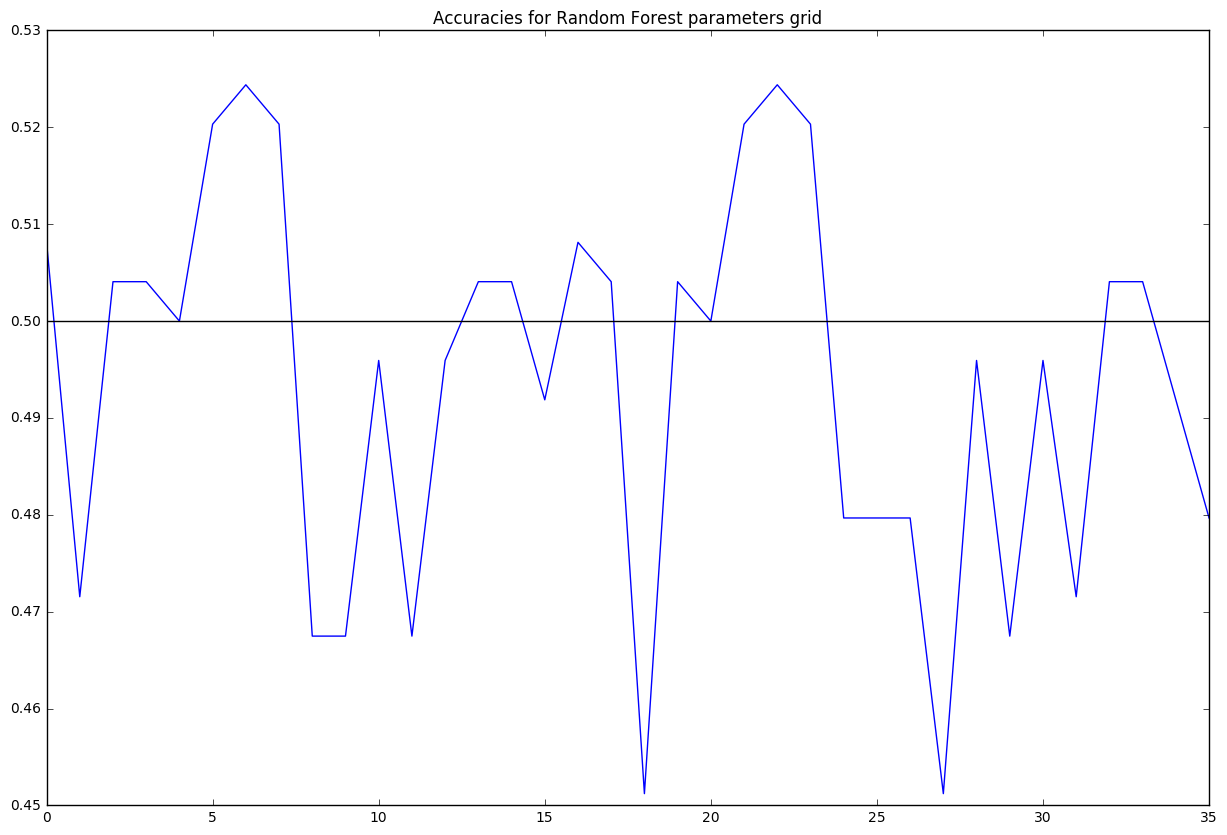

In [57]:
from matplotlib import pyplot as plt
accuracy_series = pd.Series(list(store_accuracy_RF.values()))
#plt.figure()
accuracy_series.plot(kind='line',figsize=(15,10),title='Accuracies for Random Forest parameters grid')
plt.axhline(0.5, color='k')
plt.show()

The graph above suggests that `Random Forest` is a good classifier for the problem at hand. In fact, every combination of parameters in the grid performs above the *coin flip* naive benchmark. <br> 
However, `54.62%` (the performance of the best set of parameters) could be considered as 'bad' performance, even though we can expect these non-stelllar performances in a financial environment (on the other hand, think about a self-driving car that manages to correctly classify pedestrians ** only** `54.62%` of the time!)

#### Extracting features importances for the best and worst parameter grid for Random Forest

Starting with the **best** parameter grid

In [58]:
import time
params = [i for i in max(store_accuracy_RF, key=store_accuracy_RF.get)]
start_time = time.time()
RF_clf = RandomForestClassifier(random_state=rand_state,
                                     n_estimators=params[0],
                                     criterion=params[1],
                                     max_features=params[2],
                                     min_impurity_split=params[3])

_, pred, best_feat = train_test_model(clf, True)
end_time = time.time()
elapsed_time = end_time - start_time
print('time elapsed: {}'.format(time.strftime('%H:%M:%S', time.gmtime(elapsed_time))))

time elapsed: 00:00:16


Calculating average feature importances across the time series and plotting the first 5 features by importance

In [59]:
best_feat_avg = np.mean(list(best_feat.values()), axis=0)

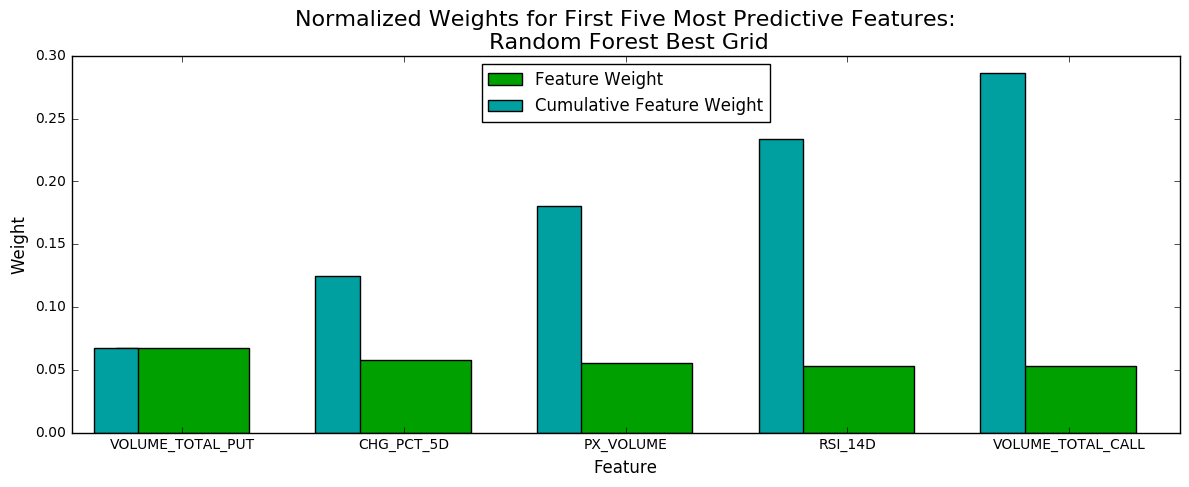

In [60]:
def feature_plot(importances, X_train, model_name):

    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (12,5))
    title = "Normalized Weights for First Five Most Predictive Features:" + "\n " + model_name
    plt.title(title, fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)

    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()
    return

feature_plot(best_feat_avg, X, 'Random Forest Best Grid')

Doing the same for the **worst** set of parameters.

In [61]:
import time
params = [i for i in min(store_accuracy_RF, key=store_accuracy_RF.get)]
start_time = time.time()
clf = RandomForestClassifier(random_state=rand_state,
                                     n_estimators=params[0],
                                     criterion=params[1],
                                     max_features=params[2],
                                     min_impurity_split=params[3])

worst_feat = train_test_model(clf, True)[2]
end_time = time.time()
elapsed_time = end_time - start_time
print('time elapsed: {}'.format(time.strftime('%H:%M:%S', time.gmtime(elapsed_time))))

time elapsed: 00:00:49


Calculating average feature importances across the time series

In [62]:
worst_feat_avg = np.mean(list(worst_feat.values()), axis=0)

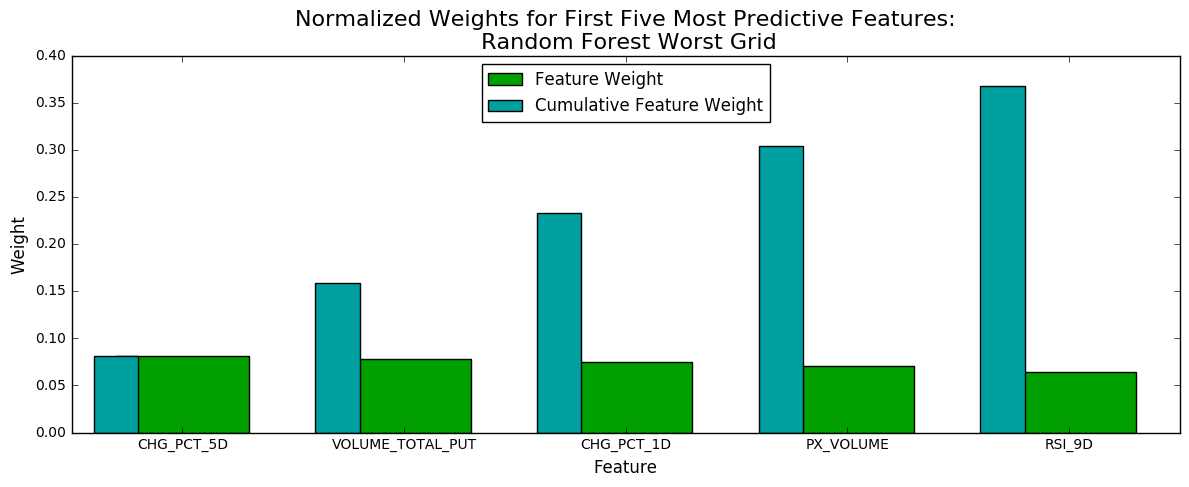

In [63]:
feature_plot(worst_feat_avg, X, 'Random Forest Worst Grid')

### Method 3: Feed-Forward Neural Network

#### 1) Walk-forward validation

In [64]:
start_time = time.time()
from sklearn.neural_network import MLPClassifier
clf_C1 = MLPClassifier(solver='lbfgs', alpha=1e-2, activation='relu', tol=1e-4, shuffle=False, verbose=False, warm_start=True,
                     hidden_layer_sizes=(100,100,100), random_state=rand_state)

accuracy, pred = train_test_model(clf_C1)
print('Neural Network v1 accuracy: {:.2%}'.format(accuracy)) 
total_pred['NN'] = pred
end_time = time.time()
elapsed_time = end_time - start_time
print('time elapsed: {}'.format(time.strftime('%H:%M:%S', time.gmtime(elapsed_time))))

Neural Network v1 accuracy: 53.66%
time elapsed: 00:07:08


#### 2) Static validation

In [65]:
start_time = time.time()
clf_C2 = MLPClassifier(solver='lbfgs', alpha=1e-4, activation='relu', tol=1e-3, shuffle=False, verbose=False, warm_start=False,
                     hidden_layer_sizes=(100,100,100), random_state=rand_state)
pred = []
# setting train_test_split
_, X_train, X_test = scale(X.iloc[:test_size], X.iloc[test_size:])
y_train, y_test = y[:test_size], y[test_size:]
# fitting classifier
clf_C2.fit(X_train, y_train)
pred = clf_C2.predict(X_test)
print('Neural Network v2 accuracy: {:.2%}'.format(accuracy_score(pred, y_true))) 
total_pred['NN_2'] = pred
end_time = time.time()
elapsed_time = end_time - start_time
print('time elapsed: {}'.format(time.strftime('%H:%M:%S', time.gmtime(elapsed_time))))

Neural Network v2 accuracy: 54.88%
time elapsed: 00:00:02


### Method 4: LSTM Network

#### Importing Keras libraries

In [66]:
np.random.seed(rand_state)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


#### Defining functions to train and test a LSTM network in Keras

In [67]:
# fit an LSTM network to training data
def fit_lstm(model, X_train, y_train, batch_size, nb_epoch, neurons, step):
    print('step #: {}'.format(step))
    if step == 0:
        shape = 1 if X_train.shape == 1 else X_train.shape[1]
        model.add(LSTM(neurons, batch_input_shape=(1, 1, shape), return_sequences=False, stateful=True))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam')
    for epoch in range(nb_epoch):
        if step == 0: print('epoch: {}'.format(epoch))
        if X_train.ndim == 1:
            model.fit(np.expand_dims(np.expand_dims(X_train, axis=0),axis=0), np.expand_dims(y_train, axis=0), epochs=1, \
                      batch_size=batch_size, verbose=0, shuffle=False)            
        else:
            model.fit(np.expand_dims(X_train, axis=1), y_train, epochs=1, batch_size=batch_size, \
                      verbose=0, shuffle=False)
        model.reset_states()
    return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X, show_pred=False):
    yhat = model.predict(np.expand_dims(np.expand_dims(X, axis=0),axis=0), batch_size=batch_size)
    if show_pred: print('yhat', yhat)
    return round(yhat[0,0], 0) # if yhat is >0.5 we assign the laebl 1, otherwise we assign it the label 0

#### Re-defining the 'train_test_model' for LSTM

In [ ]:
def train_test_lstm(model, batch_size, nb_epoch, neurons):
    '''
    Performs train/test split before calling LSTM model
    '''
    pred = []
    step = 0
    _, X_train, X_test = scale(X.iloc[:test_size], X.iloc[test_size:], (-1, 1)) # range (-1,1) for the scaling
    y_train, y_test = y[:test_size], y[test_size:]
    while test_size+step < len(y):
        if step > 0:
            X_train = X_test[step-1, :]
            y_train = y_test[step-1]
        # calling LSTM model
        model = fit_lstm(model, X_train, y_train, batch_size, nb_epoch, neurons, step)
        pred.append(forecast_lstm(model, batch_size, X_test[step]))
        step +=1
    # consistency check
    #print((y_true==y_test).all())
    #######
    accuracy = accuracy_score(np.asarray(pred), np.asarray(y_true))
    return accuracy, pred

#### Running the LSTM model in 'Walk-Forward validation' mode only

In [ ]:
# LSTM initialization
# Parameters setting
batch_size = 1

LSTM_dict = {}
# super Loop to check various combinations of neurons and number of epochs
epochs_list = [1, 5, 10, 100, 1000, 3000]
neurons_list = [1, 2, 3, 10, 50]

for i in epochs_list:
    for j in neurons_list:
        model = Sequential()
        print('nb_epochs: {} | neurons: {}'.format(i,j))
        start_time = time.time()
        nb_epoch = i
        neurons = j
        # each dictionary entry is represented by a number of epochs and neurons
        # e.g. LSTM[e5n3] will store the LSTM results with 5 epochs and 3 neurons
        LSTM_dict['e'+str(i)+'n'+str(j)] = {}
        ####################
        accuracy, pred = train_test_lstm(model, batch_size, nb_epoch, neurons)
        LSTM_dict['e'+str(i)+'n'+str(j)]['accuracy'] = accuracy
        LSTM_dict['e'+str(i)+'n'+str(j)]['pred'] = pred
        print('LSTM accuracy: {:.2%}'.format(accuracy))
        end_time = time.time()
        elapsed_time = end_time - start_time
        print('time elapsed: {}'.format(time.strftime('%H:%M:%S', time.gmtime(elapsed_time))))

nb_epochs: 1 | neurons: 1
step #: 0
epoch: 0
step #: 1
step #: 2
step #: 3
step #: 4
step #: 5
step #: 6
step #: 7
step #: 8
step #: 9
step #: 10
step #: 11
step #: 12
step #: 13
step #: 14
step #: 15
step #: 16
step #: 17
step #: 18
step #: 19
step #: 20
step #: 21
step #: 22
step #: 23
step #: 24
step #: 25
step #: 26
step #: 27
step #: 28
step #: 29
step #: 30
step #: 31
step #: 32
step #: 33
step #: 34
step #: 35
step #: 36
step #: 37
step #: 38
step #: 39
step #: 40
step #: 41
step #: 42
step #: 43
step #: 44
step #: 45
step #: 46
step #: 47
step #: 48
step #: 49
step #: 50
step #: 51
step #: 52
step #: 53
step #: 54
step #: 55
step #: 56
step #: 57
step #: 58
step #: 59
step #: 60
step #: 61
step #: 62
step #: 63
step #: 64
step #: 65
step #: 66
step #: 67
step #: 68
step #: 69
step #: 70
step #: 71
step #: 72
step #: 73
step #: 74
step #: 75
step #: 76
step #: 77
step #: 78
step #: 79
step #: 80
step #: 81
step #: 82
step #: 83
step #: 84
step #: 85
step #: 86
step #: 87
step #:

### Checking the LSTM dictionary and printing out accuracy score in descending order

In [ ]:
LSTM_acc = [(key,LSTM_dict[key]['accuracy']) for key in list(LSTM_dict.keys())]
LSTM_acc.sort(key=lambda x: x[1], reverse=True)
LSTM_acc

[('e1n10', 0.56504065040650409),
 ('e5n3', 0.54065040650406504),
 ('e5n10', 0.54065040650406504),
 ('e10n2', 0.54065040650406504),
 ('e1000n50', 0.53658536585365857),
 ('e5n1', 0.53658536585365857),
 ('e5n2', 0.53658536585365857),
 ('e1000n10', 0.53252032520325199),
 ('e10n50', 0.52845528455284552),
 ('e5n50', 0.52439024390243905),
 ('e1n50', 0.52439024390243905),
 ('e1n1', 0.52032520325203258),
 ('e3000n10', 0.51626016260162599),
 ('e10n10', 0.51219512195121952),
 ('e10n1', 0.51219512195121952),
 ('e10n3', 0.50813008130081305),
 ('e1000n2', 0.50813008130081305),
 ('e1n3', 0.50813008130081305),
 ('e3000n3', 0.50406504065040647),
 ('e100n2', 0.5),
 ('e3000n2', 0.49593495934959347),
 ('e1000n1', 0.49593495934959347),
 ('e3000n50', 0.49593495934959347),
 ('e100n50', 0.49593495934959347),
 ('e100n1', 0.48373983739837401),
 ('e100n10', 0.47967479674796748),
 ('e3000n1', 0.47154471544715448),
 ('e1n2', 0.45934959349593496),
 ('e100n3', 0.45934959349593496),
 ('e1000n3', 0.41056910569105692)]

### Additional Evaluation Metrics: Modified Accuracy

#### Shifting '1d % Chg' column to get the future percentage changes for each step

In [ ]:
perc_chg_test = perc_chg[test_size+1:]
print('Perc chg test size: {}'.format(perc_chg_test.shape))

Perc chg test size: (246,)


#### 'Modified accuracy' definition

In [ ]:
def modified_accuracy(y_pred, y_true, perc_chg):
    '''
    Receives three arrays: y_pred and y_true with labels for each time step, and perc_chg, 
    with the percentage change in price for that specific step (i.e. the label that a 
    regression model would try to predict).
    Returns the mean of an array where each value is the absolute value 
    of the percentage change if the prediction for that given time step is correct,
    or minus such absolute value if the prediction is wrong 
    '''
    return np.sum([perc_chg[idx] if i==1 else -perc_chg[idx] for idx, i in enumerate((y_pred==y_true))])

#### Let's test this function on the persistence forecast, to get its modified accuracy

In [ ]:
persistence_forecast_mod_acc = modified_accuracy(np.asarray(persistence_forecast_test), y_true, perc_chg_test)
print('Persistence Forecast Modified Accuracy: {}'.format(persistence_forecast_mod_acc))

Persistence Forecast Modified Accuracy: -27.360000000000007


### Algorithms comparison

#### `Sklearn` algorithms (Naive Bayes, Random Forest, MLP)

In [ ]:
mod_acc = {}
for key in total_pred.keys():
    mod_acc[key] = {}
    mod_acc[key]['mod_acc'] = modified_accuracy(total_pred[key], y_true, perc_chg_test)
    mod_acc[key]['acc'] = accuracy_score(total_pred[key], y_true)

mod_acc_pd = pd.DataFrame(mod_acc)

mod_acc_pd

,NB,NB_2,NN,NN_2,RF,RF_2
acc,0.536585,0.520325,0.536585,0.54878,0.495935,0.487805
mod_acc,-90.200000,-239.440000,-36.760000,-202.70000,-97.200000,-127.380000


#### `LSTM` model (comparing all parameters combinations)

In [ ]:
LSTM_mod_acc = {}
for key in LSTM_dict.keys():
    LSTM_mod_acc[key] = {}
    LSTM_mod_acc[key]['mod_acc'] = modified_accuracy(LSTM_dict[key]['pred'], y_true, perc_chg_test)
    LSTM_mod_acc[key]['acc'] = LSTM_dict[key]['accuracy']

sort_key = 'acc'
acc_list = sorted([LSTM_mod_acc[key][sort_key] for key in LSTM_mod_acc.keys()], reverse=True)

print('LSTM set | Accuracy        | Modified Accuracy', '\n')
printed_keys = []
for i in acc_list:
    for key in LSTM_mod_acc.keys():
        if i == LSTM_mod_acc[key][sort_key] and key not in printed_keys: 
            print(key, ' | ', LSTM_mod_acc[key]['acc'], ' | ',  LSTM_mod_acc[key]['mod_acc'])
            printed_keys.append(key)

LSTM set | Accuracy        | Modified Accuracy 

e1n10  |  0.565040650407  |  -230.96
e5n3  |  0.540650406504  |  -169.54
e5n10  |  0.540650406504  |  -142.4
e10n2  |  0.540650406504  |  -148.16
e1000n50  |  0.536585365854  |  -13.62
e5n1  |  0.536585365854  |  -204.98
e5n2  |  0.536585365854  |  -184.04
e1000n10  |  0.532520325203  |  1.32
e10n50  |  0.528455284553  |  -77.56
e5n50  |  0.524390243902  |  -97.28
e1n50  |  0.524390243902  |  -191.44
e1n1  |  0.520325203252  |  -117.42
e3000n10  |  0.516260162602  |  -52.3
e10n10  |  0.512195121951  |  -102.5
e10n1  |  0.512195121951  |  -65.42
e10n3  |  0.508130081301  |  -146.88
e1n3  |  0.508130081301  |  -57.12
e1000n2  |  0.508130081301  |  -3.68
e3000n3  |  0.50406504065  |  11.02
e100n2  |  0.5  |  -21.76
e3000n2  |  0.49593495935  |  -34.74
e1000n1  |  0.49593495935  |  -1.12
e3000n50  |  0.49593495935  |  -54.48
e100n50  |  0.49593495935  |  -29.96
e100n1  |  0.483739837398  |  -82.88
e100n10  |  0.479674796748  |  -31.92
e3000n

#### Basic synthetic statistics about the LSTM

In [ ]:
LSTM_mod_acc_pd = pd.DataFrame(LSTM_mod_acc)

LSTM_mod_acc_pd.transpose().describe()

,acc,mod_acc
count,30.000000,30.000000
mean,0.508130,-70.702000
std,0.031252,84.145688
min,0.410569,-230.960000
25%,0.495935,-136.155000
50%,0.510163,-55.800000
75%,0.531504,-15.655000
max,0.565041,177.560000


> End